<a href="https://colab.research.google.com/github/EINSHOWERADMIRAL/EINSHOWERADMIRAL/blob/main/IMPLEMENTING_LASSO_REGRESSION_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [1]:
import numpy as np

LASSO REGRESSION


In [2]:
# creating a class for Lasso Regression
class Lasso_Regression():
  #initiating the hyperparameters
  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter
  # fitting the dataset to the Lasso Regression model
  def fit(self, X, Y):
    # m --> number of Data points --> number of rows
    # n --> number of input features --> number of columns
    self.m, self.n = X.shape
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y
    # implementing Gradient Descent algorithm for Optimization
    for i in range(self.no_of_iterations):     # missed "self"
      self.upadte_weights()
  # function for updating the weight & bias value
  def upadte_weights(self):
    # linear equation of the model
    Y_prediction = self.predict(self.X)
    # gradients (dw, db)
    # gradient for weight
    dw = np.zeros(self.n)
    for i in range(self.n):
      if self.w[i]>0:
        dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) + self.lambda_parameter) / self.m
      else :
        dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) - self.lambda_parameter) / self.m
    # gradient for bias
    db = - 2 * np.sum(self.Y - Y_prediction) / self.m
    # updating the weights & bias
    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db
  # Predicting the Target variable
  def predict(self,X):
    return X.dot(self.w) + self.b

Using Linear Regression model for Prediction

In [3]:
 # importing the dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics

Data Pre-Processing

In [4]:
# loading the data from csv file to a pandas dataframe
salary_data = pd.read_csv('/content/salary_data.csv')
# printing the first 5 columns of the dataframe
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
# last 5 rows of the dataframe
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [6]:
# number of rows & columns in the dataframe
salary_data.shape

(30, 2)

In [7]:
# checking for missing values
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


In [8]:
features = salary_data.iloc[:,:-1].values
target = salary_data.iloc[:,1].values

In [9]:
print(features)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [10]:
print(target)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


Splitting the dataset into training & test data

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target,test_size=0.33,random_state = 2)

Training the Linear Regression model

In [12]:
model = Lasso_Regression(learning_rate = 0.02, no_of_iterations=1000,lambda_parameter=200)

In [13]:
model.fit(X_train, Y_train)

Predict the salary value for test data

In [14]:
test_data_prediction = model.predict(X_test)

In [15]:
print(test_data_prediction)

[ 36068.90441536  34166.14804787  66513.00629512  58901.98082518
  91248.83907243  80783.67905126 101713.9990936   52242.33353898
  42728.55170156  88394.7045212 ]


In [16]:
from sklearn import metrics
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)
print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9041366551714738
Mean Absolute Error :  6675.382767802961


Comparing the error with SKLearn Lasso Regression

In [17]:
from sklearn.linear_model import Lasso
sk_model = Lasso()

In [18]:
sk_model.fit(X_train, Y_train)

Lasso()

In [19]:
sk_test_data_prediction = sk_model.predict(X_test)

In [21]:
# R squared error
score_1_ = metrics.r2_score(Y_test, sk_test_data_prediction)
# Mean Absolute Error
score_2_ = metrics.mean_absolute_error(Y_test, sk_test_data_prediction)
print("R squared error : ", score_1_)
print('Mean Absolute Error : ', score_2_)

R squared error :  0.9041817142395875
Mean Absolute Error :  6673.480440148538


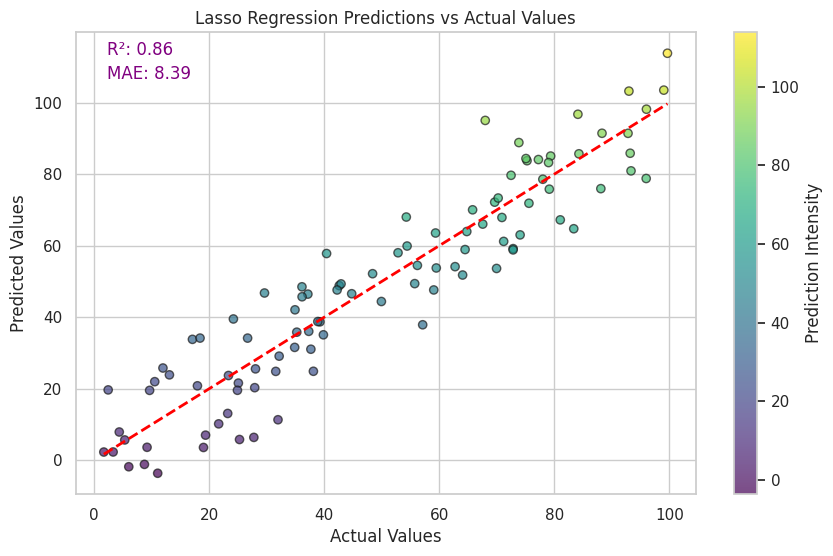

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
# Generate sample data (You can replace this with your own data)
Y_test = np.random.rand(100) * 100  # Replace with actual Y_test values
sk_test_data_prediction = Y_test + np.random.normal(0, 10, 100)  # Replace with actual predictions
# Calculate R-squared and Mean Absolute Error
score_1_ = metrics.r2_score(Y_test, sk_test_data_prediction)
score_2_ = metrics.mean_absolute_error(Y_test, sk_test_data_prediction)
# Set up the plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
# Scatter plot with color gradient
points = plt.scatter(Y_test, sk_test_data_prediction, c=sk_test_data_prediction, cmap='viridis', alpha=0.7, edgecolor='k')
# Plot a line for perfect prediction
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color="red", linestyle="--", linewidth=2)
# Annotate R-squared and MAE
plt.text(0.05, 0.95, f'R²: {score_1_:.2f}', transform=plt.gca().transAxes, fontsize=12, color="purple")
plt.text(0.05, 0.90, f'MAE: {score_2_:.2f}', transform=plt.gca().transAxes, fontsize=12, color="purple")
# Color bar for predictions
cbar = plt.colorbar(points)
cbar.set_label("Prediction Intensity")
# Labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Lasso Regression Predictions vs Actual Values")
# Show plot
plt.show()